# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Joshua Immanuel Fransisko Manurung
- Email:joshuamanurung2609@gmail.com
- Id Dicoding:josss26

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh dari Working Day dalam jumlah penggunaan bike-sharing?
- Bagaimana pengaruh dari Holiday dalam jumlah penggunaan bike-sharing?
- Bagaimana pengaruh cuaca terhadap jumlah penggunaan bike-sharing?
- Apakah Musim berpengaruh terhadap jumlah penggunaan bike-sharing?
- Bagaimana Tren penggunaan bike-sharing berdasarkan Jam?
- Bagaimana Tren Penggunaan Bike-sharing berdasarkan Bulan?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Membuat tabel bike_day_df

In [3]:
bike_day_df = pd.read_csv('drive/MyDrive/Dicoding/Belajar Analisis Data dengan Python/Proyek Akhir/Data/day.csv')
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membuat tabel bike_hour_df

In [4]:
bike_hour_df = pd.read_csv('drive/MyDrive/Dicoding/Belajar Analisis Data dengan Python/Proyek Akhir/Data/hour.csv')
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data bike_day_df

In [5]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


berdasarkan output dari method **info()** terdapat kesalahan tipe data pada kolom dteday yang seharusnya direpresentasikan sebagai tipe data **datetime**, bukan tipe data **object**.

In [6]:
bike_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

berdasarkan output tersebut pada tabel **bike_day_df** tidak terdapat missing value

In [7]:
print('Jumlah Duplikasi data: ', bike_day_df.duplicated().sum())

Jumlah Duplikasi data:  0


berdasarkan output tersebut, pada tabel **bike_day_df** tidak terdapat data yang terduplikasi.

In [8]:
bike_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan output tersebut, pada tabel **bike_day_df** memiliki parameter statistik yang sesuai di setiap kolom nya.

#### Menilai Data bike_hour_df

In [9]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


berdasarkan output dari method **info()** , sama seperti tabel **bike_day_df** , pada tabel **bike_hour_df** terdapat kesalahan tipe data pada kolom dteday yang seharusnya direpresentasikan sebagai tipe data **datetime**, bukan tipe data **object**.

In [10]:
bike_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

berdasarkan output tersebut pada tabel **bike_hour_df** tidak terdapat missing value

In [11]:
print('Jumlah Duplikasi data: ', bike_hour_df.duplicated().sum())

Jumlah Duplikasi data:  0


berdasarkan output tersebut pada tabel **bike_hour_df** tidak terdapat data yang terduplikasi.

In [12]:
bike_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan output tersebut, pada tabel **bike_hour_df** memiliki parameter statistik yang sesuai di setiap kolom nya.

### Cleaning Data

Berdasarkan hasil setelah melakukan assesing data, baik pada tabel **bike_day_df** dan tabel **bike_hour_df** hanya perlu melakukan perbaikan tipe data pada kolom dteday.

#### Cleansing Data pada Tabel bike_day_df

In [13]:
bike_day_df['dteday'] = pd.to_datetime(bike_day_df['dteday'])
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

tipe data kolom **dteday** telah berhasil diubah dengan menggunakan library pandas

#### Cleansing data pada Tabel bike_hour_df

In [14]:
bike_hour_df['dteday'] = pd.to_datetime(bike_hour_df['dteday'])
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

tipe data kolom **dteday** telah berhasil diubah dengan menggunakan library pandas

## Exploratory Data Analysis (EDA)

### Explore bike_day_df

In [15]:
bike_day_df.describe(include='all')

<ipython-input-15-ec37f75ba117>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Mengembalikan nilai awal dari kolom season ke nilai sebenarnya untuk memudahkan visualisasi nantinya.

In [16]:
season = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
bike_day_df['season'] = bike_day_df['season'].map(season)

In [17]:
bike_day_df.groupby(by='season').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Springer,60622,410726,471348


Mengembalikan nilai awal dari kolom yr ke nilai sebenarnya untuk memudahkan visualisasi nantinya.

In [18]:
year = {
    0: '2011',
    1: '2012'
}
bike_day_df['yr'] = bike_day_df['yr'].map(year)

In [19]:
bike_day_df.groupby(by='yr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
yr,,,
2012,372765,1676811,2049576
2011,247252,995851,1243103


In [20]:
bike_day_df.groupby(by='mnth').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
mnth,,,
8,72039,279155,351194
6,73906,272436,346342
9,70323,275668,345991
7,78157,266791,344948
5,75285,256401,331686
10,59760,262592,322352
4,60802,208292,269094
11,36603,218228,254831
3,44444,184476,228920


Mengembalikan nilai awal dari kolom weekday ke nilai sebenarnya untuk memudahkan visualisasi nantinya.

In [21]:
days = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
bike_day_df['weekday'] = bike_day_df['weekday'].map(days)

In [22]:
bike_day_df.groupby(by='weekday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
weekday,,,
Friday,78238,409552,487790
Thursday,61460,423935,485395
Saturday,153852,323955,477807
Wednesday,57319,415729,473048
Tuesday,57843,411266,469109
Monday,70784,384719,455503
Sunday,140521,303506,444027


Mengembalikan nilai awal dari kolom workingday ke nilai sebenarnya untuk memudahkan visualisasi nantinya.

In [23]:
holiday = {
    0: 'Holiday',
    1: 'Working Day'
}
bike_day_df['workingday'] = bike_day_df['workingday'].map(holiday)

In [24]:
bike_day_df.groupby(by='workingday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
workingday,,,
Working Day,303285,1989125,2292410
Holiday,316732,683537,1000269


In [25]:
holidays = {
    0: 'Not a Holiday',
    1: 'Holiday'
}
bike_day_df['holiday'] = bike_day_df['holiday'].map(holidays)

In [26]:
bike_day_df.groupby(by='holiday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
holiday,,,
Not a Holiday,597658,2616586,3214244
Holiday,22359,56076,78435


Mengembalikan nilai awal dari kolom weathersit ke nilai sebenarnya untuk memudahkan visualisasi nantinya. Disini saya mengelompokkannya menjadi seperti berikut:
- Clear Weather: Clear, Few clouds, Partly cloudy, Partly cloudy
- Misty Weather: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- Light Weather: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- Extreme Weather: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

agar tidak terlalu panjang ketika di visualisasikan.

In [27]:
wheaters = {
    1: 'Clear Weather',
    2: 'Misty Weather',
    3: 'Light Weather',
    4: 'Extreme Weather'
}
bike_day_df['weathersit'] = bike_day_df['weathersit'].map(wheaters)

In [28]:
bike_day_df.groupby(by='weathersit').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
weathersit,,,
Clear Weather,446346,1811606,2257952
Misty Weather,169776,827082,996858
Light Weather,3895,33974,37869


### Explore bike_hour_df

In [29]:
bike_hour_df.describe(include='all')

<ipython-input-29-dbcbe24590f3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_hour_df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Dikarenakan dataset Day dan Hour memiliki strutur yang mirip, yang membedakannya hanya pada dataset hour memiliki tambahan kolom hour yang tidak ada di dataset Day. Maka pada dataset Hour saya hanya melakukan explorasi untuk kolom hour.

In [30]:
bike_hour_df.groupby(by='hr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh dari Working Day dalam jumlah penggunaan bike-sharing?

In [31]:
workingdays = bike_day_df.groupby(by='workingday').agg(
    total=('cnt', 'sum')
).sort_values(by='total', ascending=False).reset_index()
workingdays

,workingday,total
0,Working Day,2292410
1,Holiday,1000269


In [32]:
workingdays['total'] = workingdays['total'] / 1000

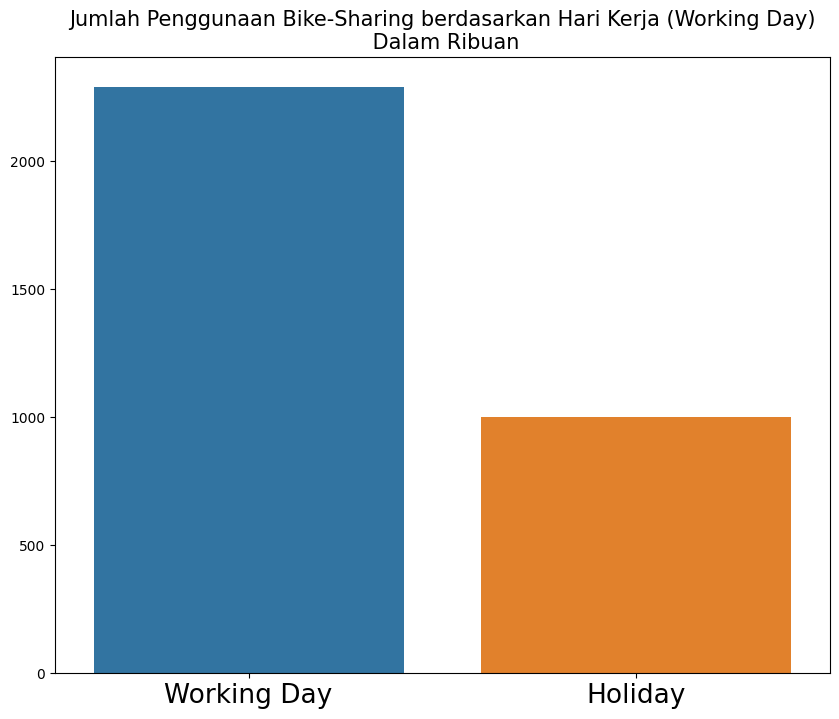

In [33]:
plt.figure(figsize=(10, 8))

sns.barplot(
    x='workingday',
    y=('total'),
    data = workingdays
)
plt.title("Jumlah Penggunaan Bike-Sharing berdasarkan Hari Kerja (Working Day)\n Dalam Ribuan", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="x", labelsize=19)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh dari Holiday dalam jumlah penggunaan bike-sharing?

In [34]:
holidayss = bike_day_df.groupby(by='holiday').agg(
    total=('cnt', 'sum'),
    count=('instant', 'nunique')
).sort_values(by='count', ascending=False).reset_index()
holidayss

,holiday,total,count
0,Not a Holiday,3214244,710
1,Holiday,78435,21


In [35]:
holidayss['total'] = holidayss['total'] / 1000

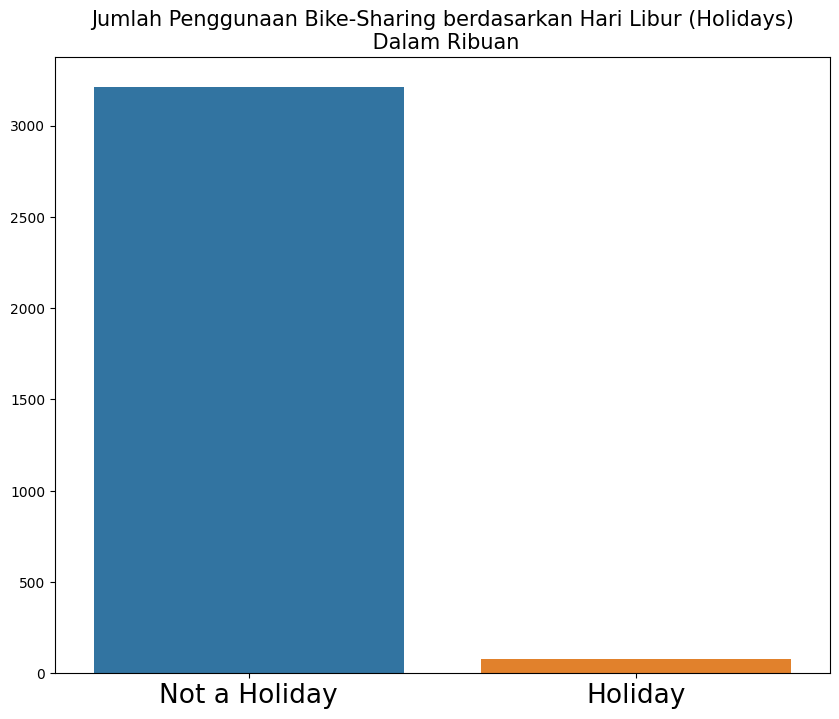

In [36]:
plt.figure(figsize=(10, 8))

sns.barplot(
    x='holiday',
    y=('total'),
    data = holidayss
)
plt.title("Jumlah Penggunaan Bike-Sharing berdasarkan Hari Libur (Holidays)\n Dalam Ribuan", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="x", labelsize=19)
plt.show()

### Pertanyaan 3: Bagaimana pengaruh cuaca terhadap jumlah penggunaan bike-sharing?

In [37]:
weathers = bike_day_df.groupby(by='weathersit').agg(
    total=('cnt','sum'),
    count=('instant','nunique')
).sort_values(by='count', ascending=False).reset_index()
weathers

,weathersit,total,count
0,Clear Weather,2257952,463
1,Misty Weather,996858,247
2,Light Weather,37869,21


In [38]:
weathers['total'] = weathers['total'] / 1000

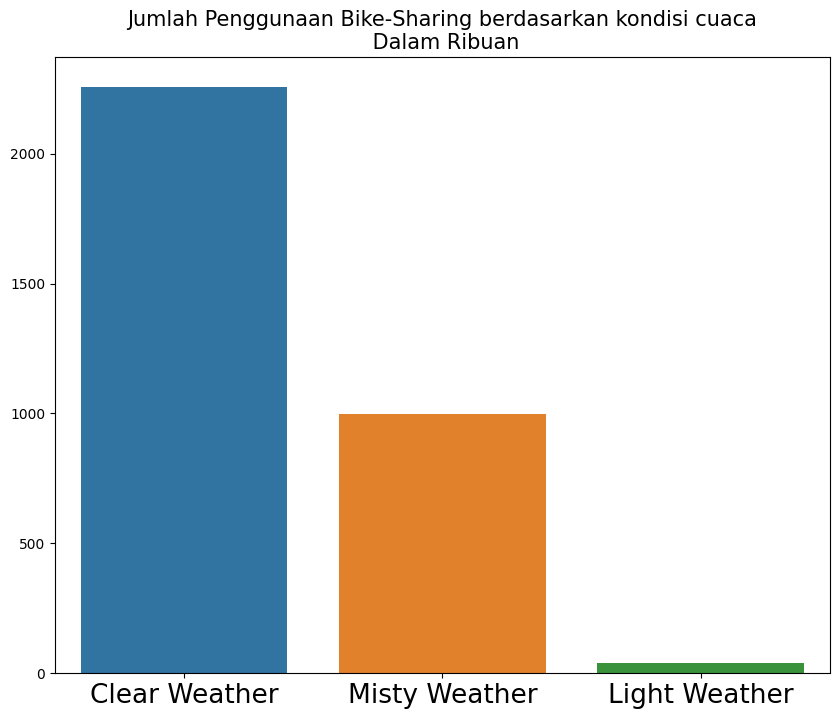

In [39]:
plt.figure(figsize=(10, 8))

sns.barplot(
    x='weathersit',
    y='total',
    data = weathers
)
plt.title("Jumlah Penggunaan Bike-Sharing berdasarkan kondisi cuaca\n Dalam Ribuan", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="x", labelsize=19)
plt.show()

### Pertanyaan 4: Apakah Musim berpengaruh terhadap jumlah penggunaan bike-sharing?

In [40]:
seasons = bike_day_df.groupby(by='season').agg(
    total=('cnt','sum'),
    count=('instant','nunique')
).sort_values(by='total', ascending=False).reset_index()
seasons

,season,total,count
0,Fall,1061129,188
1,Summer,918589,184
2,Winter,841613,178
3,Springer,471348,181


In [41]:
seasons['total'] = seasons['total'] / 1000

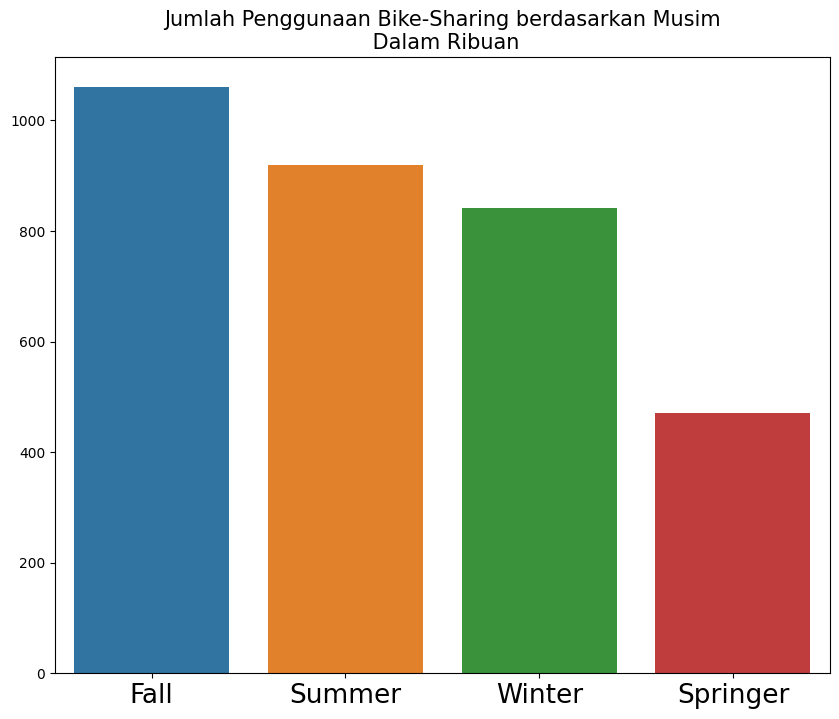

In [42]:
plt.figure(figsize=(10, 8))

sns.barplot(
    x='season',
    y='total',
    data = seasons
)
plt.title("Jumlah Penggunaan Bike-Sharing berdasarkan Musim\n Dalam Ribuan", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="x", labelsize=19)
plt.show()

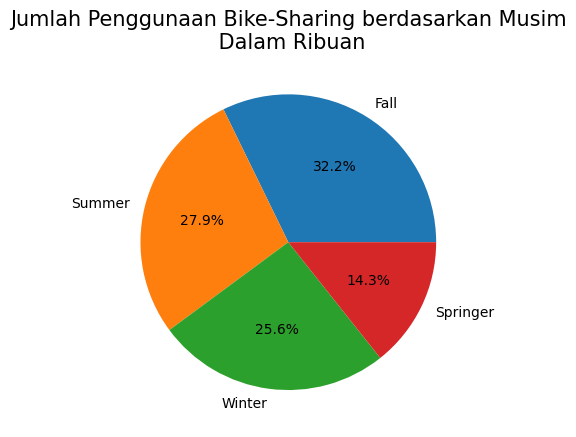

In [43]:
plt.pie(
    x='total',
    labels='season',
    data=seasons,
    autopct='%1.1f%%'
)
plt.title("Jumlah Penggunaan Bike-Sharing berdasarkan Musim\n Dalam Ribuan", loc="center", fontsize=15)
plt.show()

### Pertanyaan 5: Bagaimana Tren penggunaan bike-sharing berdasarkan Jam?

In [44]:
hours = bike_hour_df.groupby(by='hr').agg(
    total=('cnt', 'sum'),
    count=('instant','nunique')
).sort_values(by='total', ascending=False).reset_index()
hours.head()

,hr,total,count
0,17,336860,730
1,18,309772,728
2,8,261001,727
3,16,227748,730
4,19,226789,728


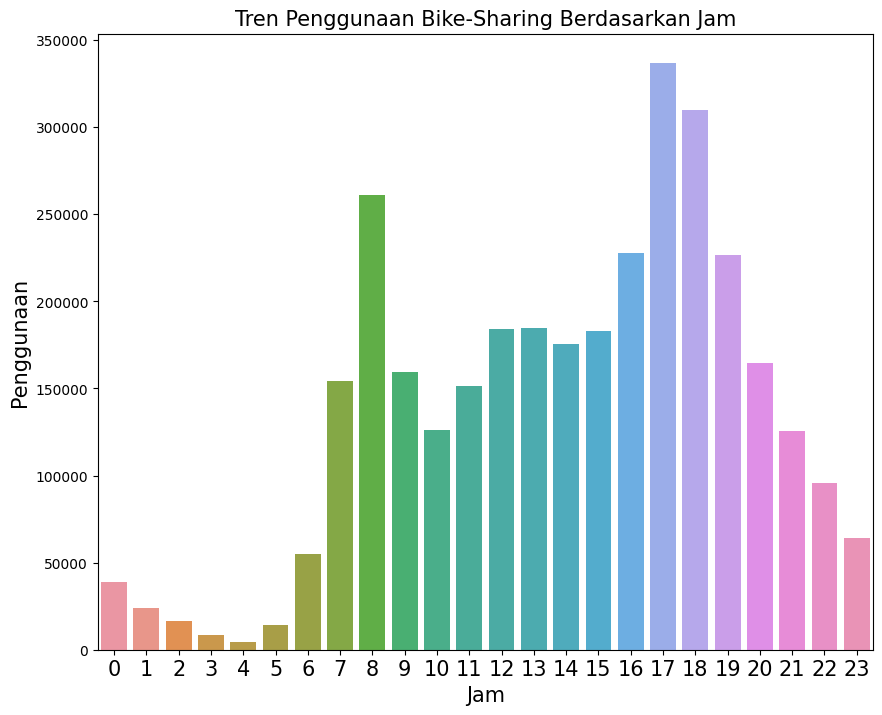

In [45]:
plt.figure(figsize=(10, 8))

sns.barplot(
    x='hr',
    y='total',
    data = hours
)
plt.title("Tren Penggunaan Bike-Sharing Berdasarkan Jam", loc="center", fontsize=15)
plt.xlabel('Jam', fontsize=15)
plt.ylabel('Penggunaan', fontsize=15)
plt.tick_params(axis="x", labelsize=15)
plt.show()

### Pertanyaan 6: Bagaimana Tren penggunaan bike-sharing berdasarkan Bulan?

In [46]:
months = bike_hour_df.groupby(by='mnth').agg(
    total=('cnt', 'sum'),
    count=('instant','nunique')
).sort_values(by='total', ascending=False).reset_index()
months

,mnth,total,count
0,8,351194,1475
1,6,346342,1440
2,9,345991,1437
3,7,344948,1488
4,5,331686,1488
5,10,322352,1451
6,4,269094,1437
7,11,254831,1437
8,3,228920,1473
9,12,211036,1483


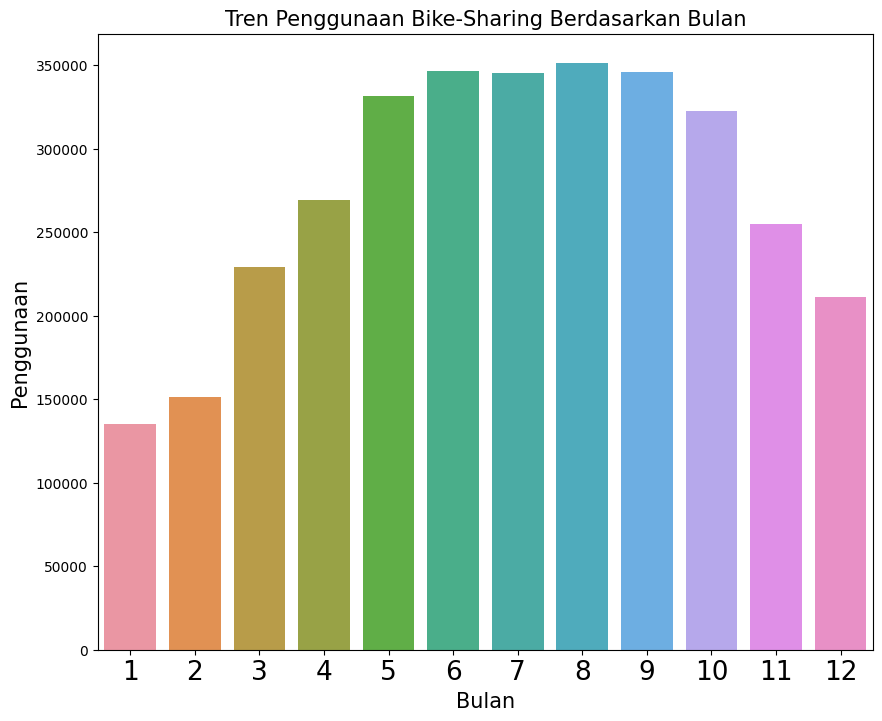

In [47]:
plt.figure(figsize=(10, 8))

sns.barplot(
    x='mnth',
    y='total',
    data = months
)
plt.title("Tren Penggunaan Bike-Sharing Berdasarkan Bulan", loc="center", fontsize=15)
plt.xlabel('Bulan', fontsize=15)
plt.ylabel('Penggunaan', fontsize=15)
plt.tick_params(axis="x", labelsize=19)
plt.show()

## Conclusion

1. Pada visualisasi bar chart dapat kita lihat bahwasanya penggunaan bike-sharing pada workingday lebih tinggi dibandingkan dengan penggunaan bike-sharing di holiday atau weekend. Hal ini dapat dipengaruhi oleh kebanyakan orang yang bekerja menggunakan sepeda sebagai moda transportasi mereka ke tempat kerja mereka yang mengakibatkan tingginya penggunaan sepeda di hari kerja.
2. Dari hasil visualisasi tersebut dapat kita lihat bahwasanya hari libur nasional tidak memberikan dampak yang begitu besar terhadap penggunaan sepeda jika dibandingkan dengan hari biasa.
3. Dari visualisasi tersebut dapat kita simpulkan bahwa cuaca yang paling mempengaruhi penggunaan bike-sharing adalah cuaca yang cerah (Clear Weather) diikuti dengan Misty Weather di posisi kedua. Dimana cuaca yang cerah akan sangat mendukung kegiatan transportasi menggunakan sepeda dengan baik.
4. Dari Visualisasi tersebut dapat kita lihat bahwasanya musim fall memiliki total penggunakan sepeda yang paling besar, sehingga dapat disimpulkan bahwa musim fall sangat berpengaruh dalam penggunaan bike-sharing.
5. Dari visualisasi tersebut dapat kita libat bahwasanya penggunaan bike-sharing meningkat di jam 8, dan jam 16 - 19 malam. hal ini mungkin dipengaruhi oleh jam kerja yang dimulai dari pukul 8 dan berakhir diantara pukul 16 - 19 malam, sehingga terjadi peningkatan penggunaan sepeda di jam-jam tersebut.
6. Dari visualisasi tersebut dapat kita lihat bahwasanya penggunaan bike-sharing dibulan 6 - 9 memiliki total penggunaan bike-sharing yang tergolong mirip. tetapi yang memiliki total penggunaan tertinggi adalah di bulan 8.

In [48]:
bike_day_df.to_csv("data_clean.csv", index=False)